In [11]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import scale
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV


In [2]:
boston = load_boston()


In [10]:
X = boston.data
X_scale = scale(X)
y = boston.target

In [14]:
kf = KFold(n_splits=5, random_state= 42, shuffle= True)

100%|████████████████████████████████████████| 200/200 [00:24<00:00,  8.72it/s]


The optimal number of neighbors is 1


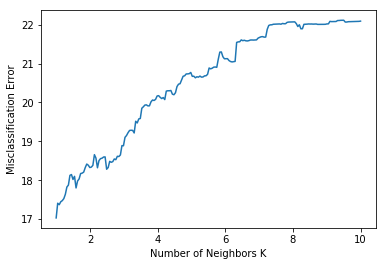

In [16]:
list_neighbors = []
list_cv_score = []
cross_dict = {}
p_list = np.linspace(1,10,200)
for i in tqdm(p_list):
    a = cross_val_score(KNeighborsRegressor(n_neighbors=5, weights= 'distance', p = i ),X_scale,y, cv = kf, scoring= 'neg_mean_squared_error').mean()
    list_cv_score.append(a)
    list_neighbors.append(i)
    cross_dict[a] = i
    
list_neighbors = np.array(list_neighbors)
list_cv_score = np.array(list_cv_score)

MSE = [1 - x for x in list_cv_score]

# determining best k
optimal_p = p_list[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_p)

# plot misclassification error vs k
plt.plot(p_list, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [17]:
cross_dict[max(list_cv_score)]

1.0

In [18]:
max(list_cv_score)

-16.030646734221644

In [19]:
list_cv_score

array([-16.03064673, -16.40783871, -16.37069695, -16.44571631,
       -16.47505777, -16.52643233, -16.63670935, -16.82422425,
       -16.87420906, -17.12489882, -17.14523188, -17.01936008,
       -17.09913174, -16.80132664, -16.9807452 , -17.0334589 ,
       -17.1716419 , -17.18167917, -17.20826374, -17.3236802 ,
       -17.41511889, -17.38566232, -17.3260386 , -17.33696698,
       -17.38264865, -17.65669751, -17.5698945 , -17.31950328,
       -17.5047325 , -17.55449418, -17.56603528, -17.59603265,
       -17.5990972 , -17.28225656, -17.32636453, -17.48516457,
       -17.46023663, -17.47743619, -17.54616769, -17.52805372,
       -17.61469633, -17.60847149, -17.65008399, -17.88913089,
       -17.88563348, -18.10186246, -18.14915478, -18.22220321,
       -18.27951784, -18.28441038, -18.28084248, -18.21471509,
       -18.51518528, -18.47144684, -18.57545141, -18.58686503,
       -18.85009529, -18.88766688, -18.93167328, -18.93731593,
       -18.91046717, -18.91321216, -19.0146467 , -19.06